
 **Universidad de Buenos Aires**
  \
 **Laboratorio de Sistemas Embebidos**
  \
 **Especialización en Inteligencia Artificial**
  \
 **Aprendizaje Automático**
 \
 \
 Integrantes:
  \
 <b>Martín, Matías</b>
  \
 <b>Rodríguez, Joaquín</b>
  \
 <b>Querales, Gabriel</b>
 \
 \
 Dataset:
 <b>Ventas de videojuegos en Steam</b>

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
import json

from scipy import stats as scipy_stats
from bs4 import BeautifulSoup
from io import StringIO
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')

### Environment version
Python 3.10.16

---

## Carga de los dataset

### Carga del dataset desde un archivo .csv que obtuvimos del sitio de Kaggle

In [2]:
df = pd.read_csv("ventas_juegos_steam.csv", header=0)
# Exploramos las primeras filas del dataframe para entender su estructura
df.head(12)

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000
5,Dota 2,81,2497040,"9 Jul, 2013",Valve,"Strategy, Action, Combat","win, mac, linux","English, Bulgarian, Czech, Danish, Dutch, Finn...",0.00,"Steam Trading Cards, Steam Workshop, SteamVR C...",13,3.71,4,80,234950000
6,EA SPORTS FC™ 25,49,67600,"27 Sep, 2024",EA Canada,"Sports, Simulation, Realistic",win,"English, French, Italian, German, Spanish - Sp...",69.99,"Single-player, Online PvP, Shared/Split Screen...",0,3.20,3,48,2320000
7,Project Zomboid,94,284985,"8 Nov, 2013",The Indie Stone,"Early Access, RPG, Simulation, Survival, Open ...","win, mac, linux","English, French, Italian, German, Spanish - Sp...",10.49,"Single-player, Online PvP, Online Co-op, Share...",17,3.66,4,59,21370000
8,Game of Thrones: Kingsroad,61,2667,"22 May, 2025",Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...",0.00,"Single-player, Online Co-op, In-App Purchases",17,3.40,3,42,361500
9,Rust,87,1018247,"8 Feb, 2018",Facepunch Studios,"Survival, Crafting, Open World, RPG, Sandbox","win, mac","English, French, Italian, German, Spanish - Sp...",18.99,"MMO, Online PvP, Online Co-op, Cross-Platform ...",17,3.20,4,65,36400000


In [3]:
# Exploramos las últimas filas del dataframe para ver si hay datos faltantes o inconsistencias
df.tail()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
2375,Wooden House,38,147,"5 Sep, 2016",GDNomaD,Simulation,win,English,0.89,"Single-player, Steam Trading Cards, Family Sha...",17,1.24,3,1,221000
2376,Shoot. Push. Repeat.,84,65,"8 Jun, 2020",CrewLab,"Puzzle, 2D",win,"English, French, Italian, German, Spanish - Sp...",0.89,"Single-player, Steam Achievements, Steam Cloud...",0,3.64,1,3,2700
2377,X2: The Threat,83,416,"3 Dec, 2003",Egosoft,"Strategy, Simulation",win,"English, French, German, Italian, Spanish - Sp...",2.99,"Single-player, Captions available, Steam Cloud...",13,3.61,4,60,47500
2378,!AnyWay!,71,498,"6 Jun, 2018",EYEFRONT,"Platformer, 2D",win,"English, Russian, French, Italian, German, Pol...",1.35,"Single-player, Steam Achievements, Steam Tradi...",0,3.00,3,2,79000
2379,UBERMOSH:OMEGA,93,314,"8 Nov, 2019",Walter Machado,"Action, Pixel Graphics",win,"English, French, Italian, German, Spanish - Sp...",0.89,"Single-player, Steam Achievements, Family Sharing",13,4.17,5,12,14000


---

## Arreglo de los dataset

**Dataset**: Ventas de videojuegos en Steam
\
**Origin**: Kaggle
\
**Descripción**: Este dataset contiene información sobre las ventas de videojuegos en la plataforma Steam, incluyendo detalles como el nombre del juego, género, desarrollador, editor, fecha de lanzamiento, precio y más. Es útil para analizar tendencias en la industria de los videojuegos y el comportamiento de los consumidores.
\
\
Debido a que el dataset se obtuvo de Kaggle, no es necesario realizar una limpieza exhaustiva de los datos, ya que se encuentra en un formato bastante limpio y estructurado.
Sin embargo, realizaremos algunas adaptaciones a nuestras necesidades de análisis en el siguiente paso con el EDA.
\
\
Elegimos realizar un modelo que pueda predecir el porcentaje de "likes" que un juego puede llegar a obtener en la plataforma, la variable se llama reviews_like_rate. El objetivo sería poder entender cuáles son los parámetros que inciden en la aprobación/desaprobación de los juegos por parte de los usuarios y poder hacer predicciones comparando distintos modelos de ML.

---

## EDA

### Funciones auxiliares para el EDA

In [4]:
def calcular_porcentaje_entradas(df, columna):
    print(f"\nPorcentaje de entradas por cada {columna}: ")
    valores = df[columna].dropna().str.split(", ")
    valores_flat = [valor for sublist in valores for valor in sublist]
    conteo_valores = Counter(valores_flat)
    total_filas = len(df)
    porcentaje_valores = {valor: (conteo / total_filas) * 100 for valor, conteo in conteo_valores.items()}
    for valor, porcentaje in sorted(porcentaje_valores.items(), key=lambda x: x[1], reverse=True):
        print(f"{valor}: {porcentaje:.2f}%")

#### Descripción del dataset `ventas_juegos_steam.csv`

 | Columna            | Descripción                                                                         | Tipo de dato |
 | -------------      | ------------------------------------------------------------------------------------| -------------- |
 | `game_name`        | El nombre del juego.                                                                 | Categórico   |
 | `reviews_like_rate`| La tasa de "me gusta" de las reseñas del juego.                                     | Numérico     |
 | `all_reviews_number`| El número total de reseñas del juego.                                               | Numérico     |
 | `release_date`     | La fecha de lanzamiento del juego.                                                    | Categórico   |
 | `developer`        | El desarrollador del juego.                                                           | Categórico   |
 | `user_defined_tags`| Las etiquetas definidas por el usuario.                                              | Categórico   |
 | `supported_os`     | Los sistemas operativos compatibles.                                                 | Categórico   |
 | `supported_languages`| Los idiomas soportados.                                                             | Categórico   |
 | `price`            | El precio del juego.                                                                  | Numérico     |
 | `other_features`   | Otras características del juego.                                                     | Categórico   |
 | `age_restriction`  | La restricción de edad del juego.                                                   | Categórico   |
 | `rating`           | La calificación del juego.                                                           | Numérico     |
 | `difficulty`      | La dificultad del juego.                                                              | Categórico   |
 | `length`          | La duración del juego.                                                                 | Numérico     |
 | `estimated_downloads`| Los descargas estimadas del juego.                                                  | Numérico     |

Cantidad de entradas del dataset junto con una muestra del mismo:


In [5]:
print("Cantidad de muestras: ", df.shape[0])
print("Muestra: ")
df.head(10)

Cantidad de muestras:  2380
Muestra: 


,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000
5,Dota 2,81,2497040,"9 Jul, 2013",Valve,"Strategy, Action, Combat","win, mac, linux","English, Bulgarian, Czech, Danish, Dutch, Finn...",0.00,"Steam Trading Cards, Steam Workshop, SteamVR C...",13,3.71,4,80,234950000
6,EA SPORTS FC™ 25,49,67600,"27 Sep, 2024",EA Canada,"Sports, Simulation, Realistic",win,"English, French, Italian, German, Spanish - Sp...",69.99,"Single-player, Online PvP, Shared/Split Screen...",0,3.20,3,48,2320000
7,Project Zomboid,94,284985,"8 Nov, 2013",The Indie Stone,"Early Access, RPG, Simulation, Survival, Open ...","win, mac, linux","English, French, Italian, German, Spanish - Sp...",10.49,"Single-player, Online PvP, Online Co-op, Share...",17,3.66,4,59,21370000
8,Game of Thrones: Kingsroad,61,2667,"22 May, 2025",Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...",0.00,"Single-player, Online Co-op, In-App Purchases",17,3.40,3,42,361500
9,Rust,87,1018247,"8 Feb, 2018",Facepunch Studios,"Survival, Crafting, Open World, RPG, Sandbox","win, mac","English, French, Italian, German, Spanish - Sp...",18.99,"MMO, Online PvP, Online Co-op, Cross-Platform ...",17,3.20,4,65,36400000


### Verificación de nulos

In [6]:
# Ver si hay algún valor faltante en general
hay_nan = df.isnull().values.any()
print("¿Hay datos faltantes en el DataFrame?", hay_nan)

# Ver la cantidad de valores faltantes por columna
faltantes_por_columna = df.isnull().sum()
print("\nDatos faltantes por columna:")
print(faltantes_por_columna)

# También podés ver un resumen más visual
print("\nPorcentaje de datos faltantes por columna:")
print((df.isnull().mean() * 100).round(2))


¿Hay datos faltantes en el DataFrame? False

Datos faltantes por columna:
game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64

Porcentaje de datos faltantes por columna:
game_name              0.0
reviews_like_rate      0.0
all_reviews_number     0.0
release_date           0.0
developer              0.0
user_defined_tags      0.0
supported_os           0.0
supported_languages    0.0
price                  0.0
other_features         0.0
age_restriction        0.0
rating                 0.0
difficulty             0.0
length                 0.0
estimated_downloads    0.0
dtype: float64


---

 ## Exploración de las variables categóricas


In [7]:
df.select_dtypes(include='object').describe()

,game_name,release_date,developer,user_defined_tags,supported_os,supported_languages,other_features
count,2380,2380,2380,2380,2380,2380,2380
unique,2380,1511,1806,1649,6,1606,761
top,UBERMOSH:OMEGA,"22 May, 2025",Valve,"Simulation, Management",win,English,"Single-player, Steam Achievements, Steam Cloud..."
freq,1,15,17,29,1724,323,275


 **Variable 'game_name':**
 Esta variable representa el nombre del juego.
 Como la variable 'game_name' es el identificador único de cada juego, no tiene valores faltantes.

 **Variable 'release_date':**
 Esta variable representa la fecha de lanzamiento del juego.

In [8]:
print("Entradas con fecha de lanzamiento faltante: ", df["release_date"].isna().sum())

Entradas con fecha de lanzamiento faltante:  0


**Variable 'developer':**
Esta variable representa el desarrollador del juego.

In [9]:
print("Entradas con desarrollador faltante: ", df["developer"].isna().sum())

Entradas con desarrollador faltante:  0


 **Variable 'user_defined_tags':**
 Esta variable representa las etiquetas definidas por el usuario para el juego.

In [10]:
print("Entradas con etiquetas definidas por el usuario faltante: ", df["user_defined_tags"].isna().sum())

Entradas con etiquetas definidas por el usuario faltante:  0


 **Variable 'supported_os':**
 Esta variable representa los sistemas operativos compatibles con el juego.

In [11]:
print("Entradas con sistemas operativos compatibles faltantes: ", df["supported_os"].isna().sum())
calcular_porcentaje_entradas(df, "supported_os")

Entradas con sistemas operativos compatibles faltantes:  0

Porcentaje de entradas por cada supported_os: 
win: 100.00%
mac: 25.04%
linux: 15.46%
music: 0.04%
: 0.04%


**Nota**: En este caso detectamos que una de las entradas estaba mal formada.

 **Variable 'supported_languages':**
 Esta variable representa los idiomas soportados por el juego.

In [12]:
print("Entradas con idiomas soportados faltantes: ", df["supported_languages"].isna().sum())
print("\nPorcentaje de entradas por cada idioma soportado: ")
calcular_porcentaje_entradas(df, "supported_languages")

Entradas con idiomas soportados faltantes:  0

Porcentaje de entradas por cada idioma soportado: 

Porcentaje de entradas por cada supported_languages: 
English: 100.00%
German: 72.14%
French: 70.76%
Simplified Chinese: 67.02%
Spanish - Spain: 66.47%
Japanese: 63.28%
Russian: 63.07%
Italian: 55.21%
Portuguese - Brazil: 51.81%
Korean: 51.13%
Polish: 42.86%
Traditional Chinese: 40.00%
Turkish: 32.69%
Spanish - Latin America: 23.57%
Portuguese - Portugal: 20.59%
Czech: 16.72%
Dutch: 15.38%
Ukrainian: 15.17%
Hungarian: 12.10%
Thai: 11.64%
Arabic: 11.64%
Swedish: 10.76%
Danish: 9.20%
Finnish: 9.03%
Norwegian: 9.03%
Vietnamese: 7.90%
Romanian: 7.82%
Greek: 7.14%
Indonesian: 5.97%
Bulgarian: 5.46%
Hindi: 2.73%
Slovak: 2.44%
Catalan: 2.35%
Filipino: 2.10%
Malay: 2.06%
Croatian: 2.02%
Serbian: 1.97%
Persian: 1.97%
Belarusian: 1.93%
Hebrew: 1.89%
Lithuanian: 1.72%
Kazakh: 1.68%
Estonian: 1.68%
Welsh: 1.64%
Slovenian: 1.60%
Georgian: 1.60%
Macedonian: 1.60%
Galician: 1.60%
Basque: 1.60%
Bangla: 1

 **Variable 'other_features':**
 Esta variable representa otras características del juego.

In [13]:
print("Entradas con otras características faltantes: ", df["other_features"].isna().sum())
print("\nPorcentaje de entradas por cada característica individual:")
calcular_porcentaje_entradas(df, "other_features")

Entradas con otras características faltantes:  0

Porcentaje de entradas por cada característica individual:

Porcentaje de entradas por cada other_features: 
Single-player: 92.69%
Family Sharing: 89.75%
Steam Achievements: 74.79%
Steam Cloud: 55.67%
Steam Trading Cards: 35.42%
Online Co-op: 21.68%
Online PvP: 19.29%
Steam Workshop: 9.66%
Steam Leaderboards: 9.66%
In-App Purchases: 9.41%
Remote Play on TV: 9.33%
Remote Play Together: 9.08%
Cross-Platform Multiplayer: 8.82%
Remote Play on Tablet: 7.94%
Stats: 6.47%
Includes level editor: 5.80%
Remote Play on Phone: 5.29%
Shared/Split Screen Co-op: 5.21%
Shared/Split Screen PvP: 4.83%
MMO: 4.12%
Captions available: 3.70%
LAN Co-op: 2.61%
HDR available: 2.48%
LAN PvP: 2.44%
Tracked Controller Support: 2.39%
VR Only: 1.72%
VR Supported: 1.47%
Commentary available: 0.63%
Steam Timeline: 0.42%
Includes Source SDK: 0.34%
SteamVR Collectibles: 0.17%
Steam Turn Notifications: 0.17%


**Variable 'age_restriction':**
Esta variable representa la restricción de edad del juego.

In [14]:
print("Entradas con restricción de edad faltante: ", df["age_restriction"].isna().sum())

Entradas con restricción de edad faltante:  0


 **Variable 'difficulty':**
 Esta variable representa la dificultad del juego.

In [15]:
print("Entradas con dificultad faltante: ", df["difficulty"].isna().sum())

Entradas con dificultad faltante:  0


---

 ## Exploración de las variables numéricas

 **Variable 'reviews_like_rate':**
 Esta variable representa la tasa de "me gusta" de las reseñas del juego.

In [16]:
df.select_dtypes(include='number').describe()

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads
count,2380.000000,2.380000e+03,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,82.413445,3.161508e+04,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06
std,12.643745,2.137197e+05,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07
min,20.000000,1.000000e+01,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01
25%,76.000000,3.420000e+02,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04
50%,85.000000,2.106500e+03,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05
75%,92.000000,1.303000e+04,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06
max,100.000000,8.803754e+06,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08


In [17]:
print("Entradas con tasa de 'me gusta' faltante: ", df["reviews_like_rate"].isna().sum())

Entradas con tasa de 'me gusta' faltante:  0


 **Variable 'all_reviews_number':**
 Esta variable representa el número total de reseñas del juego.

In [18]:
print("Entradas con número total de reseñas faltante: ", df["all_reviews_number"].isna().sum())

Entradas con número total de reseñas faltante:  0


 **Variable 'price':**
 Esta variable representa el precio del juego.

In [19]:
print("Entradas con precio faltante: ", df["price"].isna().sum())

Entradas con precio faltante:  0


 **Variable 'rating':**
 Esta variable representa la calificación del juego.

In [20]:
print("Entradas con calificación faltante: ", df["rating"].isna().sum())

Entradas con calificación faltante:  0


 **Variable 'length':**
 Esta variable representa la duración del juego.

In [21]:
print("Entradas con duración faltante: ", df["length"].isna().sum())

Entradas con duración faltante:  0


 **Variable 'estimated_downloads':**
 Esta variable representa el número de descargas estimadas del juego.

In [22]:
print("Entradas con descargas estimadas faltantes: ", df["estimated_downloads"].isna().sum())

Entradas con descargas estimadas faltantes:  0


---

 ## Análisis Estadístico Descriptivo

 ### Análisis más profundo de las variables numéricas

                     reviews_like_rate  all_reviews_number     price  \
reviews_like_rate             1.000000            0.041926 -0.047984   
all_reviews_number            0.041926            1.000000  0.038044   
price                        -0.047984            0.038044  1.000000   
rating                        0.534457            0.079721  0.222551   
length                        0.022845            0.221055  0.342366   
estimated_downloads           0.031049            0.863408  0.061999   

                       rating    length  estimated_downloads  
reviews_like_rate    0.534457  0.022845             0.031049  
all_reviews_number   0.079721  0.221055             0.863408  
price                0.222551  0.342366             0.061999  
rating               1.000000  0.336254             0.119670  
length               0.336254  1.000000             0.275514  
estimated_downloads  0.119670  0.275514             1.000000  


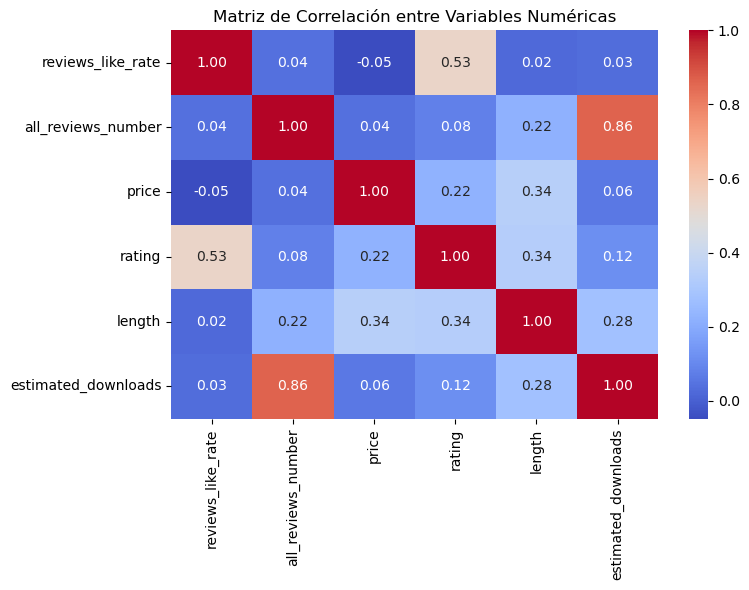

In [23]:
numeric_columns = ['reviews_like_rate', 'all_reviews_number', 'price', 'rating', 'length', 'estimated_downloads']
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

---

 ## Visualizaciones del EDA

 ### Histograma y Boxplot de la distribución de Precios

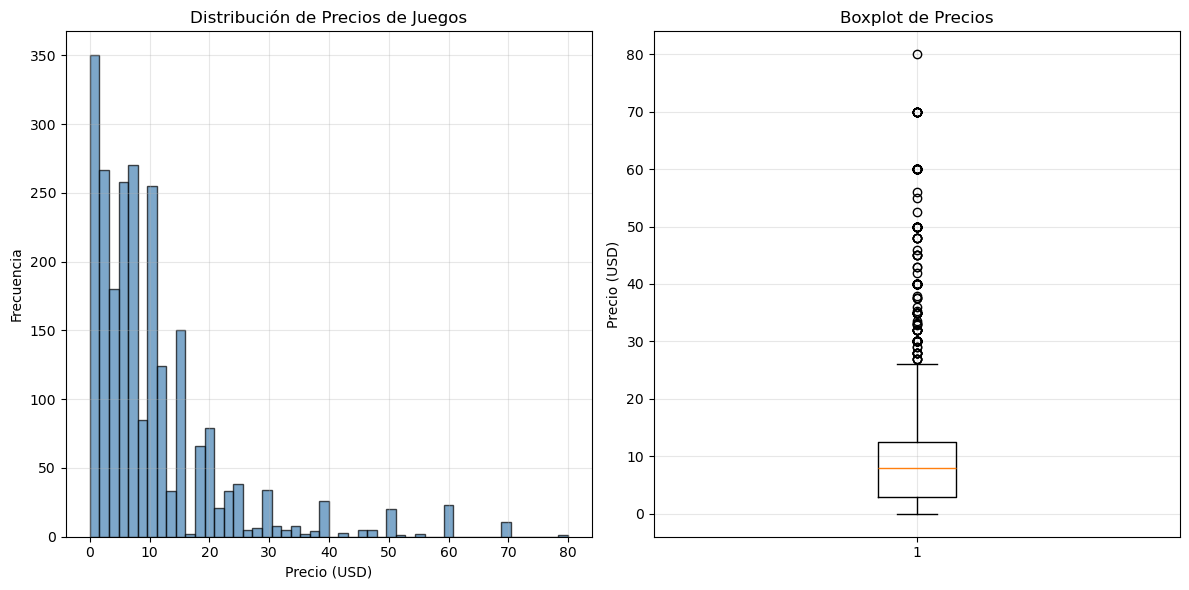

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['price'].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Distribución de Precios de Juegos')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['price'].dropna())
plt.title('Boxplot de Precios')
plt.ylabel('Precio (USD)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Estadísticas de precios

In [25]:
print(f"Precio promedio: ${df['price'].mean():.2f}")
print(f"Precio mediano: ${df['price'].median():.2f}")
print(f"Precio mínimo: ${df['price'].min():.2f}")
print(f"Precio máximo: ${df['price'].max():.2f}")
print(f"Desviación estándar: ${df['price'].std():.2f}")

Precio promedio: $10.51
Precio mediano: $7.99
Precio mínimo: $0.00
Precio máximo: $79.99
Desviación estándar: $11.34


### Juegos gratuitos vs pagos

In [26]:
juegos_gratuitos = (df['price'] == 0).sum()
juegos_pagos = (df['price'] > 0).sum()
total_juegos = len(df)

print(f"\nJuegos gratuitos: {juegos_gratuitos} ({juegos_gratuitos/total_juegos*100:.1f}%)")
print(f"Juegos de pago: {juegos_pagos} ({juegos_pagos/total_juegos*100:.1f}%)")


Juegos gratuitos: 169 (7.1%)
Juegos de pago: 2211 (92.9%)


### Análisis de Calificaciones, me gusta y Reviews

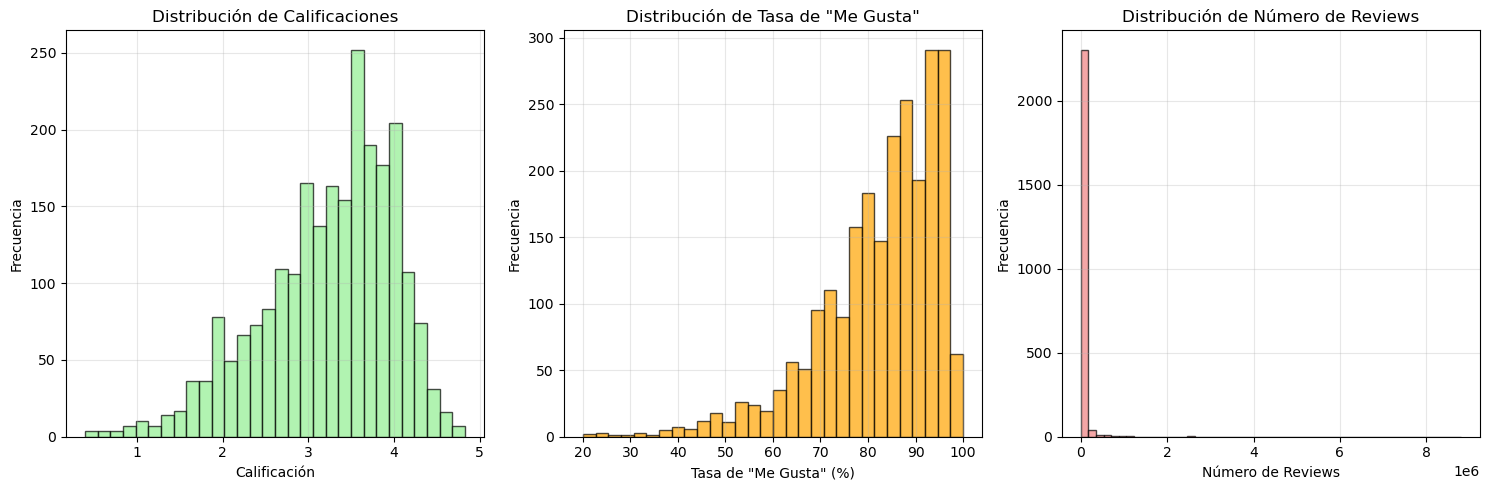

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['rating'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df['reviews_like_rate'].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribución de Tasa de "Me Gusta"') #Variable objetivo
plt.xlabel('Tasa de "Me Gusta" (%)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(df['all_reviews_number'].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribución de Número de Reviews')
plt.xlabel('Número de Reviews')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análisis de correlación entre rating y reviews

Esta relación será explorada con mayor detenimiento en la sección de tratamiento y selección de features.

In [28]:
print(f"Calificación promedio: {df['rating'].mean():.2f}")
print(f"Tasa de 'me gusta' promedio: {df['reviews_like_rate'].mean():.2f}%")
print(f"Número promedio de reviews: {df['all_reviews_number'].mean():.0f}")

corr_rating_like = df['rating'].corr(df['reviews_like_rate'])
print(f"\nCorrelación entre calificación y tasa de 'me gusta': {corr_rating_like:.3f}")

Calificación promedio: 3.23
Tasa de 'me gusta' promedio: 82.41%
Número promedio de reviews: 31615

Correlación entre calificación y tasa de 'me gusta': 0.534


### Análisis de Desarrolladores
Top 10 de los desarrolladores o empresa con mas titulos presentes en el dataset.

In [29]:
top_developers = df['developer'].value_counts().head(10)
print(top_developers)

developer
Valve                         17
Arc System Works              16
CAPCOM Co., Ltd.              12
CREATIVE ASSEMBLY             11
Ubisoft Montreal              10
Square Enix                   10
Paradox Development Studio    10
id Software                    9
KONAMI                         8
Wales Interactive              8
Name: count, dtype: int64


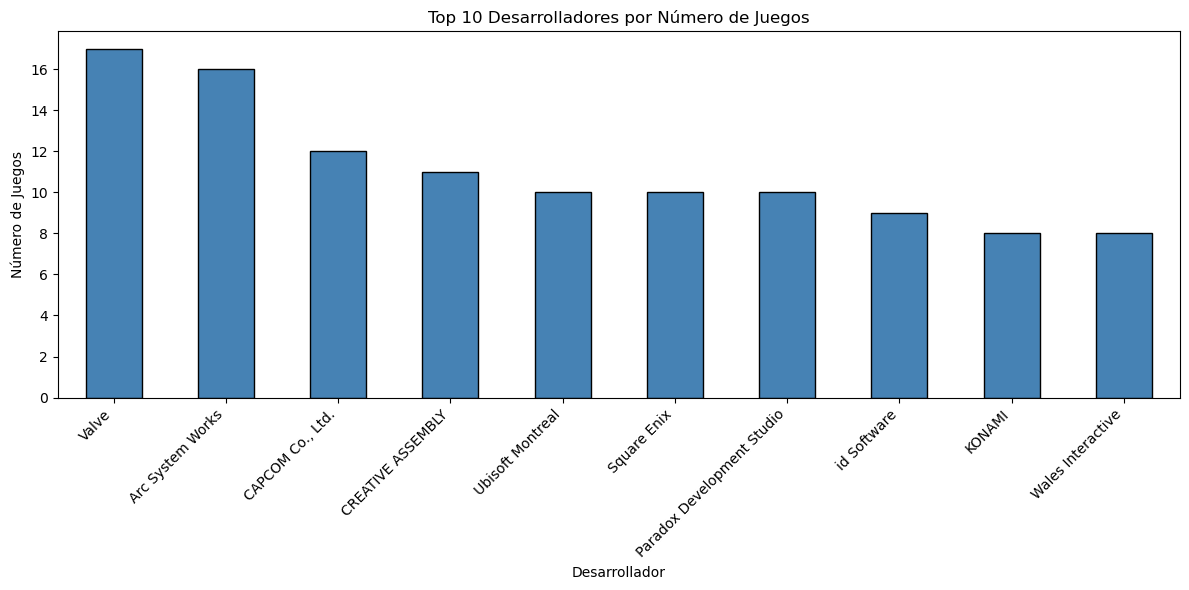

In [30]:
plt.figure(figsize=(12, 6))
top_developers.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Desarrolladores por Número de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de géneros más populares.

In [31]:
all_tags = []
for tags in df['user_defined_tags'].dropna():
    all_tags.extend(tags.split(', '))

tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common(15)

print("Top 15 géneros/tags más populares:")
for tag, count in top_tags:
    percentage = (count / len(df)) * 100
    print(f"{tag}: {count} juegos ({percentage:.1f}%)")

Top 15 géneros/tags más populares:
Simulation: 736 juegos (30.9%)
Action: 730 juegos (30.7%)
Adventure: 522 juegos (21.9%)
RPG: 437 juegos (18.4%)
Strategy: 353 juegos (14.8%)
2D: 308 juegos (12.9%)
Horror: 299 juegos (12.6%)
FPS: 246 juegos (10.3%)
Survival: 237 juegos (10.0%)
Open World: 236 juegos (9.9%)
Puzzle: 221 juegos (9.3%)
Management: 201 juegos (8.4%)
Early Access: 199 juegos (8.4%)
Roguelike: 177 juegos (7.4%)
Building: 176 juegos (7.4%)


### Visualización de top géneros

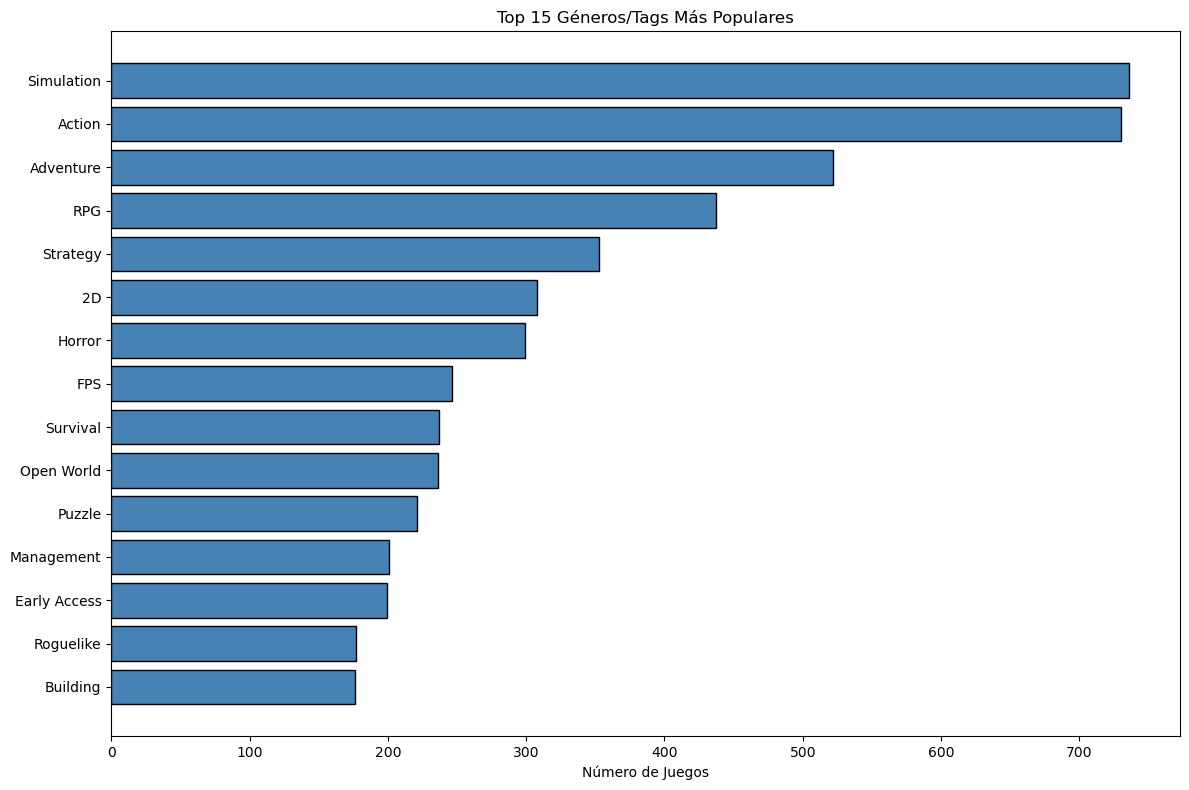

In [32]:
plt.figure(figsize=(12, 8))
tags, counts = zip(*top_tags)
plt.barh(range(len(tags)), counts, color='steelblue', edgecolor='black')
plt.yticks(range(len(tags)), tags)
plt.xlabel('Número de Juegos')
plt.title('Top 15 Géneros/Tags Más Populares')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Análisis de sistemas operativos soportados

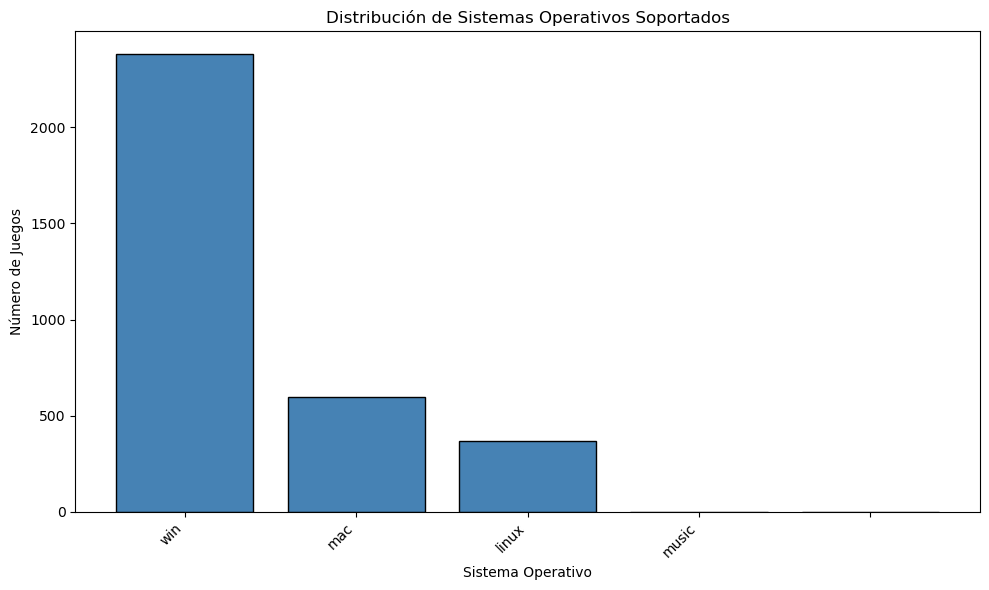

In [33]:
plt.figure(figsize=(10, 6))

os_counts = Counter()
for os_list in df['supported_os'].dropna():
    os_counts.update(os_list.split(', '))

os_names, os_counts_list = zip(*os_counts.most_common())
plt.bar(os_names, os_counts_list, color='steelblue', edgecolor='black')
plt.title('Distribución de Sistemas Operativos Soportados')
plt.xlabel('Sistema Operativo')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de Fechas de Lanzamiento

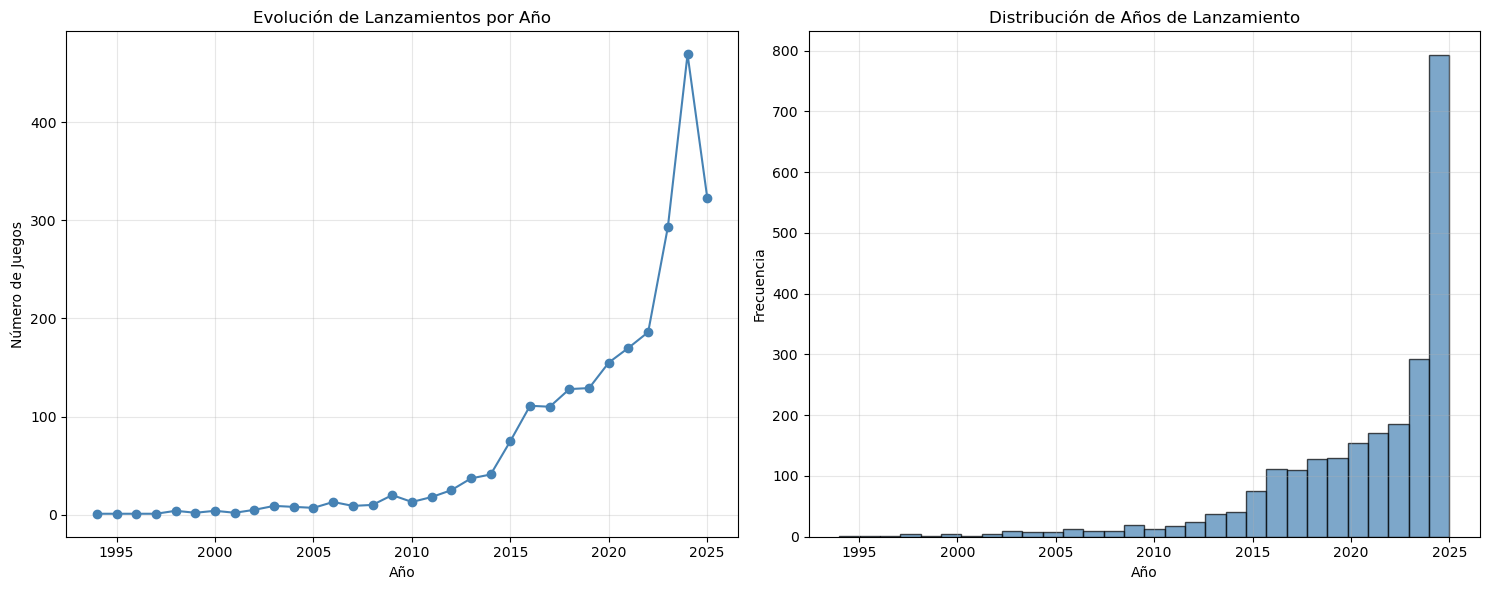

In [34]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o', color='steelblue')
plt.title('Evolución de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['release_year'].dropna(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análisis de Duración y Descargas

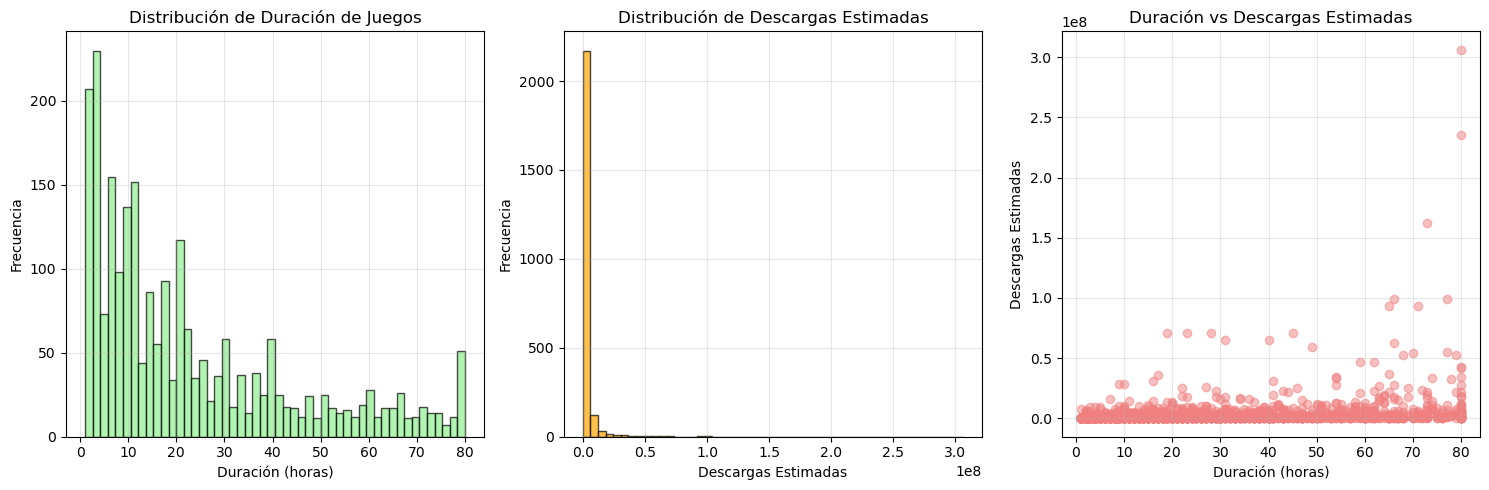

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['length'].dropna(), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribución de Duración de Juegos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df['estimated_downloads'].dropna(), bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribución de Descargas Estimadas')
plt.xlabel('Descargas Estimadas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(df['length'], df['estimated_downloads'], alpha=0.5, color='lightcoral')
plt.title('Duración vs Descargas Estimadas')
plt.xlabel('Duración (horas)')
plt.ylabel('Descargas Estimadas')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Estadísticas de duración y descargas

In [36]:
print(f"Duración promedio: {df['length'].mean():.1f} horas")
print(f"Duración mediana: {df['length'].median():.1f} horas")
print(f"Descargas promedio: {df['estimated_downloads'].mean():.0f}")
print(f"Descargas mediana: {df['estimated_downloads'].median():.0f}")

Duración promedio: 23.0 horas
Duración mediana: 16.0 horas
Descargas promedio: 2523007
Descargas mediana: 217150


### Correlación entre duración y descargas

In [37]:
corr_length_downloads = df['length'].corr(df['estimated_downloads'])
print(f"\nCorrelación entre duración y descargas: {corr_length_downloads:.3f}")


Correlación entre duración y descargas: 0.276


---

 ## Análisis de Relaciones entre Variables


### Análisis de Precio vs Calificación

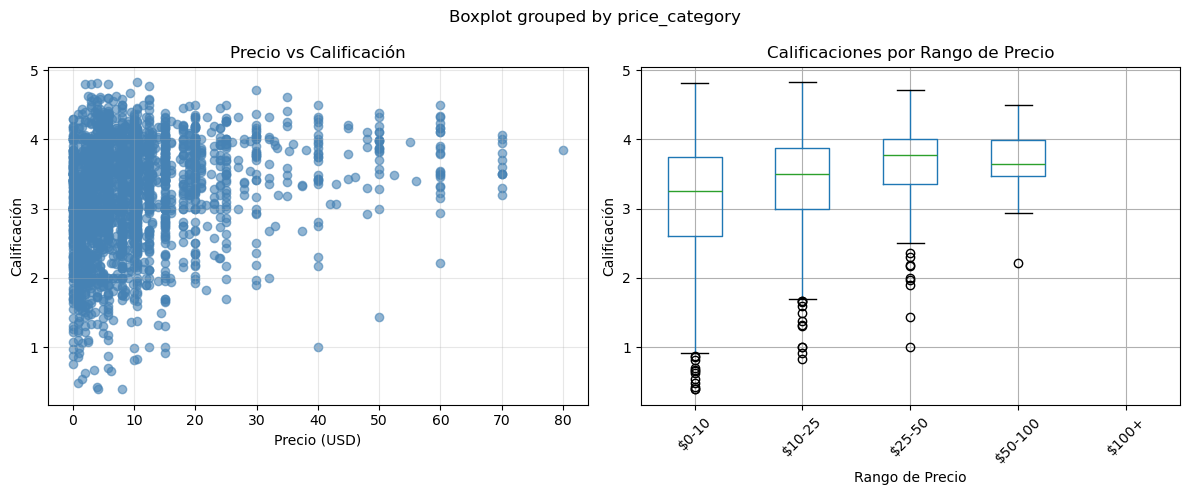

In [38]:
df_graf = df.copy()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_graf['price'], df_graf['rating'], alpha=0.6, color='steelblue')
plt.title('Precio vs Calificación')
plt.xlabel('Precio (USD)')
plt.ylabel('Calificación')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df_graf['price_category'] = pd.cut(df_graf['price'], bins=[0, 10, 25, 50, 100, float('inf')], 
                              labels=['$0-10', '$10-25', '$25-50', '$50-100', '$100+'])
df_graf.boxplot(column='rating', by='price_category', ax=plt.gca())
plt.title('Calificaciones por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Calificación')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---

## Outliers

### Outlier analyzer

A continuación realizamos análisis y tratamiento de los outliers de la variable objetivo usando diferentes métodos vistos en clase.

In [39]:
class OutlierAnalyzer:
    def __init__(self, data, target_column):
        self.data = data.copy()
        self.target = target_column
        self.outliers_results = {}
    
    def basic_statistics(self):
        target_data = self.data[self.target]
        
        stats_dict = {
            'count': len(target_data),
            'mean': target_data.mean(),
            'median': target_data.median(),
            'std': target_data.std(),
            'min': target_data.min(),
            'max': target_data.max(),
            'q1': target_data.quantile(0.25),
            'q3': target_data.quantile(0.75),
            'iqr': target_data.quantile(0.75) - target_data.quantile(0.25),
            'skewness': scipy_stats.skew(target_data),
            'kurtosis': scipy_stats.kurtosis(target_data)
        }
        
        return stats_dict
    
    def iqr_method(self, k=1.5):
        target_data = self.data[self.target]
        
        Q1 = target_data.quantile(0.25)
        Q3 = target_data.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        outliers_mask = (target_data < lower_bound) | (target_data > upper_bound)
        outliers = self.data[outliers_mask]
        
        self.outliers_results['IQR'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'method_params': {'k': k}
        }
        
        print(f"\nMétodo IQR (k={k}):")
        print(f"Límite inferior: {lower_bound:.2f}")
        print(f"Límite superior: {upper_bound:.2f}")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def zscore_method(self, threshold=3):
        target_data = self.data[self.target]
        z_scores = np.abs(scipy_stats.zscore(target_data))
        
        outliers_mask = z_scores > threshold
        outliers = self.data[outliers_mask]
        
        self.outliers_results['ZScore'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'threshold': threshold,
            'z_scores': z_scores,
            'method_params': {'threshold': threshold}
        }
        
        print(f"\nMétodo Z-Score (threshold={threshold}):")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def modified_zscore_method(self, threshold=3.5):
        target_data = self.data[self.target]
        
        median = np.median(target_data)
        mad = np.median(np.abs(target_data - median))
        modified_z_scores = 0.6745 * (target_data - median) / mad
        
        outliers_mask = np.abs(modified_z_scores) > threshold
        outliers = self.data[outliers_mask]
        
        self.outliers_results['Modified_ZScore'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'threshold': threshold,
            'modified_z_scores': modified_z_scores,
            'method_params': {'threshold': threshold}
        }
        
        print(f"\nMétodo Z-Score modificado (threshold={threshold}):")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def isolation_forest_method(self, contamination=0.1):
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns.tolist()
        
        exclude_cols = ['estimated_downloads']
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
        
        X = self.data[numeric_cols].fillna(self.data[numeric_cols].median())
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        outliers_pred = iso_forest.fit_predict(X_scaled)
        
        outliers_mask = outliers_pred == -1
        outliers = self.data[outliers_mask]
        
        self.outliers_results['Isolation_Forest'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'contamination': contamination,
            'features_used': numeric_cols,
            'method_params': {'contamination': contamination}
        }
        
        print(f"\nMétodo Isolation Forest (contamination={contamination}):")
        print(f"Características usadas: {len(numeric_cols)}")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def visualize_outliers(self, figsize=(20, 15)):
        fig, axes = plt.subplots(3, 3, figsize=figsize)
        fig.suptitle(f'Análisis de Outliers - {self.target}', fontsize=16, fontweight='bold')
        
        target_data = self.data[self.target]
        
        axes[0,0].hist(target_data, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        axes[0,0].axvline(target_data.mean(), color='red', linestyle='--', label=f'Media: {target_data.mean():.2f}')
        axes[0,0].axvline(target_data.median(), color='green', linestyle='--', label=f'Mediana: {target_data.median():.2f}')
        axes[0,0].set_title('Distribución')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        box_plot = axes[0,1].boxplot(target_data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('steelblue')
        axes[0,1].set_title('Box Plot')
        axes[0,1].grid(True, alpha=0.3)
        
        scipy_stats.probplot(target_data, dist="norm", plot=axes[0,2])
        axes[0,2].set_title('Q-Q Plot (Normalidad)')
        axes[0,2].grid(True, alpha=0.3)
        
        if 'IQR' in self.outliers_results:
            iqr_outliers = self.outliers_results['IQR']['outliers'][self.target]
            axes[1,0].scatter(range(len(target_data)), target_data, alpha=0.6, label='Normal', s=20)
            if len(iqr_outliers) > 0:
                outlier_indices = iqr_outliers.index
                axes[1,0].scatter(outlier_indices, iqr_outliers, color='red', edgecolor='black', label=f'Outliers IQR ({len(iqr_outliers)})', s=50)
            axes[1,0].set_title('Outliers - Método IQR')
            axes[1,0].legend()
            axes[1,0].grid(True, alpha=0.3)
        
        if 'ZScore' in self.outliers_results:
            z_scores = self.outliers_results['ZScore']['z_scores']
            axes[1,1].scatter(range(len(z_scores)), z_scores, alpha=0.6, s=20)
            axes[1,1].axhline(y=3, color='red', linestyle='--', label='Threshold (±3)')
            axes[1,1].axhline(y=-3, color='red', linestyle='--')
            axes[1,1].set_title('Z-Scores')
            axes[1,1].legend()
            axes[1,1].grid(True, alpha=0.3)
        
        if 'Modified_ZScore' in self.outliers_results:
            mod_z_scores = self.outliers_results['Modified_ZScore']['modified_z_scores']
            axes[1,2].scatter(range(len(mod_z_scores)), mod_z_scores, alpha=0.6, s=20, color='purple', edgecolor='black')
            axes[1,2].axhline(y=3.5, color='red', linestyle='--', label='Threshold (±3.5)')
            axes[1,2].axhline(y=-3.5, color='red', linestyle='--')
            axes[1,2].set_title('Modified Z-Scores')
            axes[1,2].legend()
            axes[1,2].grid(True, alpha=0.3)
        
        methods = []
        counts = []
        colors = ['blue', 'orange', 'green', 'red']
        
        for method, results in self.outliers_results.items():
            methods.append(method)
            counts.append(results['count'])
        
        bars = axes[2,0].bar(methods, counts, color=colors[:len(methods)], edgecolor='black')
        axes[2,0].set_title('Outliers por Método')
        axes[2,0].tick_params(axis='x', rotation=45)
        
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            axes[2,0].text(bar.get_x() + bar.get_width()/2., height,
                          f'{count}', ha='center', va='bottom')
        
        sorted_data = np.sort(target_data)
        y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        axes[2,1].plot(sorted_data, y, marker='o', markersize=3)
        axes[2,1].set_title('Función de Distribución Acumulativa')
        axes[2,1].grid(True, alpha=0.3)
        
        if 'rating' in self.data.columns:
            axes[2,2].scatter(self.data['rating'], target_data, alpha=0.6, s=20)
            axes[2,2].set_xlabel('Rating')
            axes[2,2].set_ylabel(self.target)
            axes[2,2].set_title(f'{self.target} vs Rating')
            axes[2,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    def outliers_summary(self):
        print("Detalles de los outliers detectados")
        
        for method, results in self.outliers_results.items():
            print(f"\nMétodo: {method}")
            print("-" * 50)
            print(f"Outliers detectados: {results['count']}")
            print(f"Porcentaje del total: {results['percentage']:.2f}%")
            
            if results['count'] > 0:
                outliers_data = results['outliers']
                target_outliers = outliers_data[self.target]
                
                print(f"Valor mínimo outlier: {target_outliers.min():.2f}")
                print(f"Valor máximo outlier: {target_outliers.max():.2f}")
                print(f"Media de outliers: {target_outliers.mean():.2f}")
                
                print(f"\nEjemplos de juegos outliers:")
                sample_size = min(5, len(outliers_data))
                sample_outliers = outliers_data.nlargest(sample_size, self.target)
                
                for idx, row in sample_outliers.iterrows():
                    print(f"  • {row['game_name']}: {row[self.target]:.1f}% ({row['all_reviews_number']} reviews)")
            print("=" * 50)
    
    def export_outliers(self, filename_prefix="outliers", min_methods=2):
        outlier_counts = {}
        outlier_details = {}
        
        for method, results in self.outliers_results.items():
            if results['count'] > 0:
                outliers_data = results['outliers']
                
                for idx, row in outliers_data.iterrows():
                    game_name = row['game_name']
                    target_value = row[self.target]
                    
                    if game_name not in outlier_counts:
                        outlier_counts[game_name] = 0
                        outlier_details[game_name] = {
                            'game_name': game_name,
                            'target_value': target_value,
                            'methods_detected': [],
                            'all_reviews_number': row.get('all_reviews_number', 'N/A'),
                            'price': row.get('price', 'N/A'),
                            'rating': row.get('rating', 'N/A'),
                            'developer': row.get('developer', 'N/A')
                        }
                    
                    outlier_counts[game_name] += 1
                    outlier_details[game_name]['methods_detected'].append(method)
        
        reliable_outliers = []
        outlier_game_names = set()

        for game_name, count in outlier_counts.items():
            if count >= min_methods:
                outlier_info = outlier_details[game_name]
                outlier_info['methods_count'] = count
                outlier_info['methods_list'] = ', '.join(outlier_info['methods_detected'])
                reliable_outliers.append(outlier_info)
                outlier_game_names.add(game_name)
        
        reliable_outliers.sort(key=lambda x: x['methods_count'], reverse=True)
        
        df_reliable = pd.DataFrame(reliable_outliers)
        
        filename = f"{filename_prefix}_restricted_{min_methods}_methods.csv"
        df_reliable.to_csv(filename, index=False)
        
        print(f"\nExportación de outliers confiables")
        print(f"Archivo exportado: {filename}")
        print(f"Outliers detectados por {min_methods} o más métodos: {len(reliable_outliers)}")
        print(f"Total de juegos analizados: {len(self.data)}")
        print(f"Porcentaje de outliers confiables: {(len(reliable_outliers)/len(self.data)*100):.2f}%")
        
        method_counts = {}
        for outlier in reliable_outliers:
            count = outlier['methods_count']
            method_counts[count] = method_counts.get(count, 0) + 1
        
        clean_data = self.data[~self.data['game_name'].isin(outlier_game_names)].copy()
        clean_filename = "ventas_juegos_steam_clean.csv"
        clean_data.to_csv(clean_filename, index=False)

Dataset cargado: 2380 juegos
Analizando outliers para la columna reviews_like_rate

Método IQR (k=2.0):
Límite inferior: 44.00
Límite superior: 124.00
Outliers detectados: 29 (1.22%)

Método Z-Score (threshold=3):
Outliers detectados: 34 (1.43%)

Método Z-Score modificado (threshold=3.5):
Outliers detectados: 29 (1.22%)

Método Isolation Forest (contamination=0.1):
Características usadas: 8
Outliers detectados: 238 (10.00%)


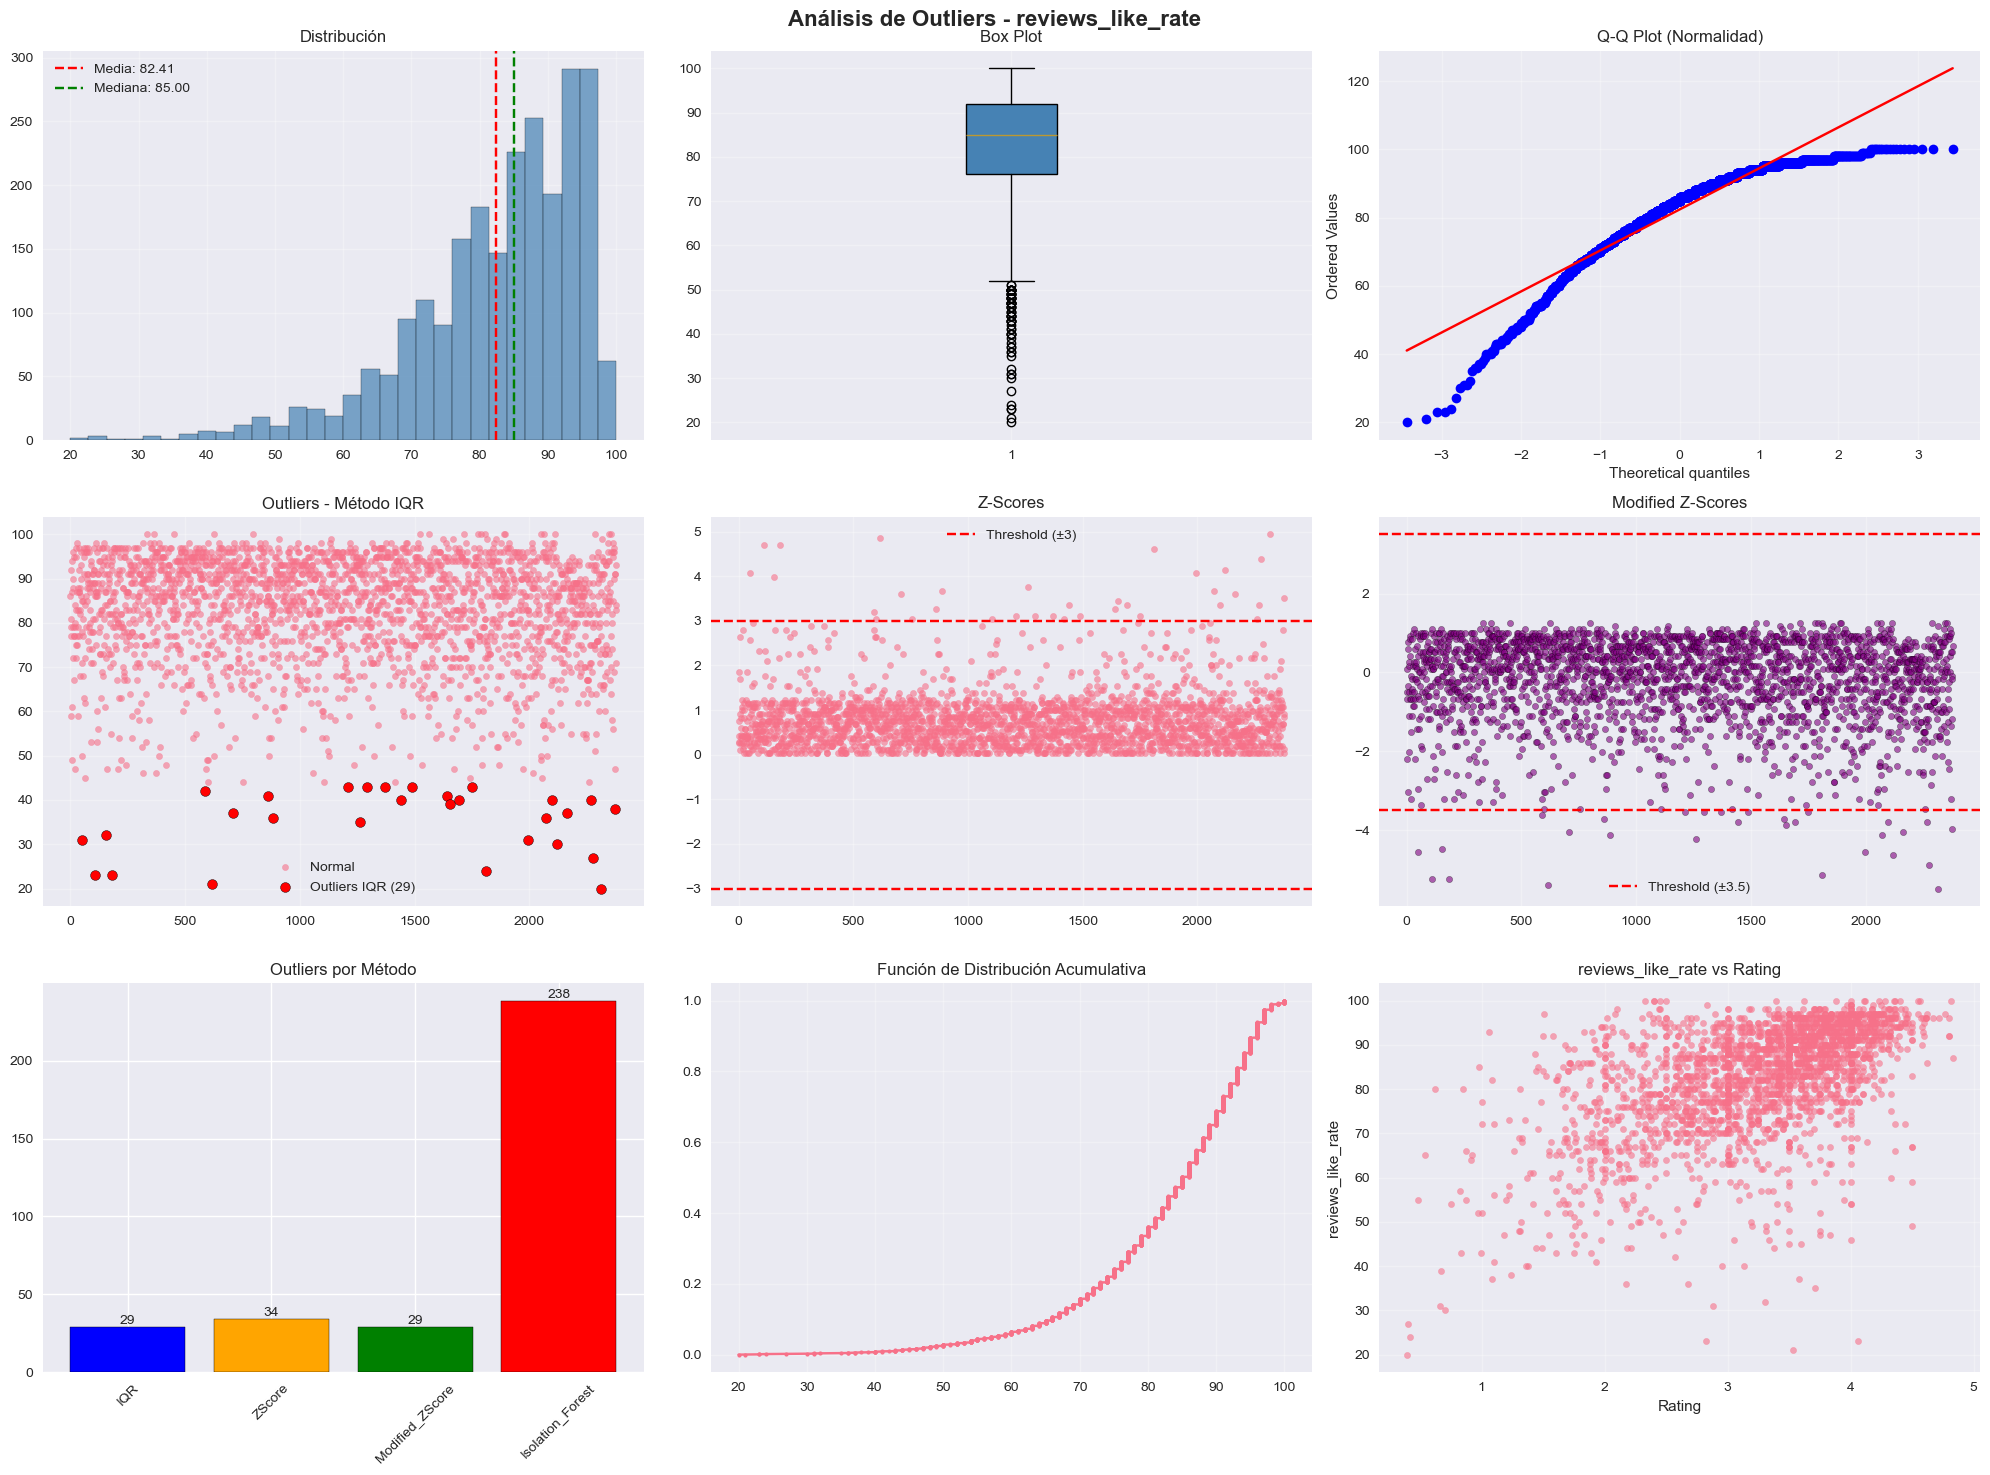

Detalles de los outliers detectados

Método: IQR
--------------------------------------------------
Outliers detectados: 29
Porcentaje del total: 1.22%
Valor mínimo outlier: 20.00
Valor máximo outlier: 43.00
Media de outliers: 35.14

Ejemplos de juegos outliers:
  • S.T.A.L.K.E.R.: Clear Sky - Enhanced Edition: 43.0% (867 reviews)
  • Youtubers Life 3 - Stream Together!: 43.0% (244 reviews)
  • iBLiS: 43.0% (558 reviews)
  • Garage Flipper: 43.0% (44 reviews)
  • SKYHILL: Black Mist: 43.0% (176 reviews)

Método: ZScore
--------------------------------------------------
Outliers detectados: 34
Porcentaje del total: 1.43%
Valor mínimo outlier: 20.00
Valor máximo outlier: 44.00
Media de outliers: 36.44

Ejemplos de juegos outliers:
  • The Walking Dead: Destinies: 44.0% (467 reviews)
  • Sonic the Hedgehog 4 - Episode I: 44.0% (2289 reviews)
  • Demolish & Build 3: 44.0% (176 reviews)
  • MudRunner VR: 44.0% (81 reviews)
  • Nifa's First Mission: 44.0% (27 reviews)

Método: Modified_ZScor

In [40]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

analyzer = OutlierAnalyzer(data=df, target_column='reviews_like_rate')

print(f"Dataset cargado: {len(df)} juegos")
print(f"Analizando outliers para la columna {analyzer.target}")

stats_outliers = analyzer.basic_statistics()
iqr_outliers = analyzer.iqr_method(k=2.0)
zscore_outliers = analyzer.zscore_method(threshold=3)
mod_zscore_outliers = analyzer.modified_zscore_method(threshold=3.5)
iso_outliers = analyzer.isolation_forest_method(contamination=0.1)

analyzer.visualize_outliers()

analyzer.outliers_summary()

analyzer.export_outliers('outliers_analysis', 1)

---

## Selección de features

In [41]:
df_features = pd.read_csv("ventas_juegos_steam_clean.csv", header=0)

---

## Limpieza de datos mal formados

Como ya mencionamos detectamos un pequeño error en dos entradas del dataset en las que una entrada separada por comas estuvo mal cargada habiendo una coma de más que causa la carga de un valor vacío. 

Estos son el juego Age of Wonders 4 en la columna de user_defined_tags y el juego Heaven Forest Nights en supported_os. 

Procedemos a corregirlo: 


In [42]:
# Limpiamos
for col in ['user_defined_tags', 'supported_os']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.rstrip(', ')


---

### Variables numéricas

Nuestro objetivo es identificar qué variables son relevantes para predecir la variable objetivo review_like_rate, optimizando la calidad del modelo.

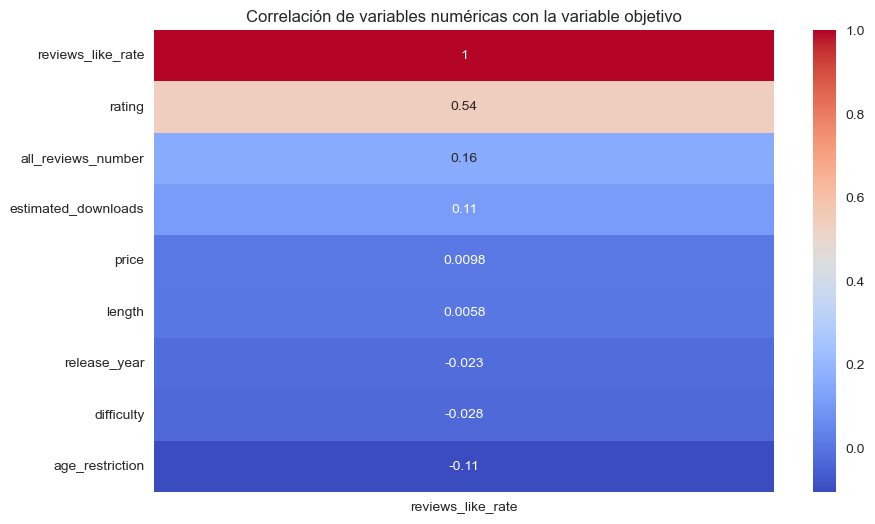

In [43]:
# Seleccionamos las variables numéricas
numerical_features = df_features.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

# Ordenamos por la VO
correlation_with_target = correlation_matrix["reviews_like_rate"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlación de variables numéricas con la variable objetivo")
plt.show()


### Rating

Como puede verse, entre las variables numéricas, solamente la variable "rating" tiene una correlación significativa con la variable objetivo. Dada la naturaleza de ambas variables sería esperable que así fuera ya que ambas son diferentes maneras de calificar los juegos por parte de los usuarios, sin embargo nos resulta interesante ver que la correlación no es tan alta como sería esperable.

Esto sugiere que, si bien rating y reviews_like_rate están relacionadas, no son equivalentes. Esto puede deberse a que cada una captura aspectos distintos de la percepción de los usuarios: mientras que review_like_rate se basa en un esquema binario de likes/dislikes, rating refleja una calificación entre 1 y 5 estrellas.

Decidimos entonces mantener la variable rating como feature, ya que aporta información relevante pero no completamente redundante con la variable objetivo. Además, al no ser una variable derivada directa de review_like_rate, su inclusión puede mejorar la capacidad predictiva del modelo sin generar data leakage.

---


In [44]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Dataset solo con rating como feature
X_rating = df_features[["rating"]]
y = df_features["reviews_like_rate"]

# Regresión lineal simple
model_rating_only = LinearRegression()
scores_rating = cross_val_score(model_rating_only, X_rating, y, cv=5, scoring='r2')
print(f"Modelo con solo rating - R² promedio: {scores_rating.mean():.4f}")


Modelo con solo rating - R² promedio: 0.2636


Realizamos esta prueba para corroborar el valor de R² solamente con la variable ratings y obtuvimos un promedio de 0.26, lo que significa que esta variable es capaz de explicar cerca del 26% de la variablidad de la VO.

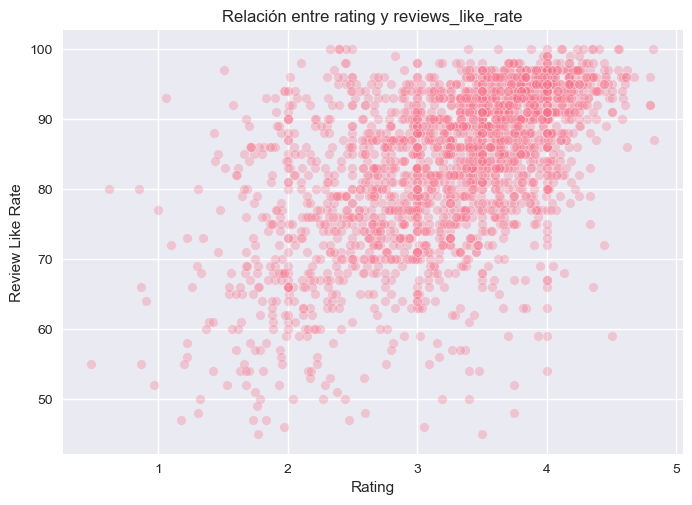

In [45]:

sns.scatterplot(data=df_features, x='rating', y='reviews_like_rate', alpha=0.3)
plt.title("Relación entre rating y reviews_like_rate")
plt.xlabel("Rating")
plt.ylabel("Review Like Rate")
plt.show()


El gráfico de dispersión entre las variables muestra una tendencia lineal entre ambas variables, lo cual confirma que a mayor calificación promedio, tiende a haber una mayor proporción de reseñas positivas. Sin embargo, también se observa bastante dispersión vertical para un mismo valor de rating, especialmente entre 3 y 4 estrellas. Esto refuerza lo encontrado en el análisis de R²: si bien Rating tiene poder explicativo, no es suficiente por sí sola para capturar completamente el comportamiento de la variable objetivo. La presencia de muchos puntos con Rating similar pero reviews_like_rate muy diferente sugiere que hay otros factores relevantes en juego, que seguiremos viendo a continuación.

### Demás variables numéricas

Si bien algunas variables numéricas muestran una correlación baja con la variable objetivo, decidimos no descartarlas en esta etapa. La correlación no mide el aporte de una variable al modelo en combinación con otras, ni captura relaciones no lineales. Por eso, como se trabajó en clase, vamos a tratar de evaluar el valor predictivo de estas utilizando Lasso.

In [46]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Variables numéricas con baja correlación
numerical_vars = ['all_reviews_number', 'estimated_downloads', 'length', 'difficulty', 'price', 'age_restriction']
X = df_features[numerical_vars]
y = df_features["reviews_like_rate"]

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos Lasso con validación cruzada (cv=5)
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

# Asociamos los coeficientes aprendidos a las variables
coef = pd.Series(lasso.coef_, index=numerical_vars)

# Mostramos los resultados
print("Coeficientes obtenidos con Lasso:")
print(coef)


Coeficientes obtenidos con Lasso:
all_reviews_number     1.150561
estimated_downloads    0.000000
length                -0.000000
difficulty            -0.000000
price                 -0.000000
age_restriction       -0.634786
dtype: float64


Habiendo aplicado Lasso podemos ver claramente que tampoco desde el punto de vista multivariable se nota una relación lineal entre estas variables y la VO. Esto nos resulta un poco inesperado ya que creíamos que sería un factor a tener en cuenta el precio (variable price) que alguien paga por un juego y las chances de que quede conforme con él, o la popularidad del mismo (variable estimated_downloads) y qué tan bueno se percibe que es, por poner ejemplos.  


Por esta razón decidimos realizar un último análisis de tipo no lineal con un RandomForestRegresor, esto nos va a ayudar a ver si hay relaciones subyacentes de tipo no lineal operando y si esto confirma o no nuestras sospechas.

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = df_features[['all_reviews_number', 'estimated_downloads', 'length', 'difficulty', 'price', 'age_restriction']]
y = df_features['reviews_like_rate']
rf_model = RandomForestRegressor(random_state=0)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Random Forest - R² promedio: {rf_scores.mean():.4f}")

Random Forest - R² promedio: 0.1113


El resultado (R² = 0.094) indica que incluso con un modelo capaz de capturar relaciones complejas, estas variables tienen un poder predictivo muy limitado respecto a reviews_like_rate. Nuestras sospechas no se corroboran. Procedemos a eliminar estas variables de las features. 

In [48]:
variables_a_eliminar = ['all_reviews_number', 'estimated_downloads', 'length', 'difficulty', 'price', 'age_restriction']
#df_features = df_features.drop(columns=variables_a_eliminar)

df_features.head()


,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads,release_year
0,ELDEN RING NIGHTREIGN,77,53426,2025-05-30,"FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000,2025
1,The Last of Us™ Part I,79,45424,2023-03-28,Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000,2023
2,Game of Thrones: Kingsroad,61,2667,2025-05-22,Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...",0.00,"Single-player, Online Co-op, In-App Purchases",17,3.40,3,42,361500,2025
3,RoadCraft,72,5134,2025-05-20,Saber Interactive,"Simulation, Building, Driving",win,"English, French, Italian, German, Spanish - Sp...",27.99,"Single-player, Online Co-op, Cross-Platform Mu...",0,3.20,3,26,325900,2025
4,R.E.P.O.,96,147407,2025-02-26,semiwork,"Early Access, Horror",win,English,5.79,"Single-player, Online Co-op, Steam Cloud, Fami...",10,3.58,4,54,12950000,2025


NOTA: *Cancelamos la eliminación de estas variables ya que al probar entrenar el modelo con ellas incluídas vimos una mejora del valor de R2 en el modelo de Random Forest Regressor de cerca de un 7% superior. Esto indicaría que sí aportan a la predicción del modelo pese a las pruebas que acabamos de realizar para corroborarlo.*

---

### Variables categóricas

### Fechas

Decidimos tratar la columa de la fecha de salida de los juegos separándola en dos columnas nuevas, una para el año y otra para el mes.
Las dos nos parecen interesantes para la variable objetivo elegida ya que nuestra hipótesis es que el gusto o la forma en la que los 
usuarios califican los juegos puede variar con los años (así como la calidad de los mismos) y también dependiendo de la época del año (ej: si los compran durante rebajas, etc.).

In [49]:
# Pasamos a la columna release_date a formato datetime
df_features["release_date"] = pd.to_datetime(df_features["release_date"], errors="coerce")

#Creamos columnas para el año y el mes de publicación
df_features["release_year"] = df_features["release_date"].dt.year
df_features["release_month"] = df_features["release_date"].dt.month
#Quitamos la columna original de release_date ya que ya no la necesitamos
df_features.drop(columns=["release_date"], inplace=True)

### Lenguajes

Sobre los lenguajes que los juegos soportan vamos a realizar un análisis de correlación con la variable objetivo para ver si es necesario 
tratar con los mismos.

In [50]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convertimos la columna en listas
df_features['supported_languages'] = df_features['supported_languages'].apply(
    lambda x: [lang.strip() for lang in x.split(',') if lang.strip()]
)

# Binarizamos para el cálculo de correlación
mlb = MultiLabelBinarizer()
lang_dummies = pd.DataFrame(
    mlb.fit_transform(df['supported_languages']),
    columns=mlb.classes_,
    index=df.index
)

# Unimos con la variable objetivo
df_lang_corr = pd.concat([df_features[['reviews_like_rate']], lang_dummies], axis=1)

# Calculamos correlación
correlations = df_lang_corr.corr()['reviews_like_rate'].drop('reviews_like_rate')

# Mostramos
summary = pd.DataFrame({
    'max_correlation': [correlations.max()],
    'min_correlation': [correlations.min()],
    'mean_correlation': [correlations.mean()],
    'total_languages': [correlations.shape[0]]
})

print("Resumen general de correlaciones:\n")
print(summary)

# Creamos una nueva variable con la cantidad total de idiomas soportados
df_features['n_languages'] = df_features['supported_languages'].apply(len)

# Calculamos la correlación 
correlation = df_features[['n_languages', 'reviews_like_rate']].corr().iloc[0, 1]

# Mostramos el resultado
print()
print(f"Correlación entre n_languages y reviews_like_rate: {correlation:.6f}")

df_features.drop(columns=["supported_languages", "n_languages"], inplace=True)

Resumen general de correlaciones:

   max_correlation  min_correlation  mean_correlation  total_languages
0         0.061096         -0.02287          0.011638               58

Correlación entre n_languages y reviews_like_rate: 0.068679


La máxima correlación es de apenas 0.086, y el promedio absoluto de las correlaciones es de solo 0.043. 
Esto significa para nosotros que esta variable, al menos en su forma actual, no ofrece información útil para 
la predicción y podría descartarse del modelo.
También probamos con una nueva variable que contaba la cantidad de lenguajes soportados por cada juego, y la misma tampoco
mostró una correlación significativa con la variable objetivo, por lo que también la descartamos.

### Developer

Uno podría pensar que quién hizo el juego es una variable relevante a la hora de predecir si un juego va a ser bien recibido o no,
por eso vamos a poner especial ateención a esta variable. 

El principal problema que encontramos es que tiene una cardinalidad muy alta, hay cerca de 1800 developers para cerca de 2300 juegos, lo que significa que la mayoría de los devs aparecen una sola vez.

Esto puede causar problemas si decidimos usar esta variable como feature, ya que el modelo podría ajustarse demasiado a los datos de entrenamiento
y no generalizar bien.

Para tratar con esta variable aplicar one-hot encoding sería un gran problema, ya que generaría una matriz dispersa con demasiadas columnas. 
Por eso decidimos el siguiente enfoque:


Developers con 1 juego(s): 1425
Developers con 2 juego(s): 171
Developers con 3 juego(s): 41
Developers con 4 juego(s): 19
Developers con 5 juego(s): 5
Developers con 6 juego(s): 8
Developers con 7 juego(s): 6
Developers con 8 juego(s): 2
Developers con 9 juego(s): 1
Developers con 10 juego(s): 1


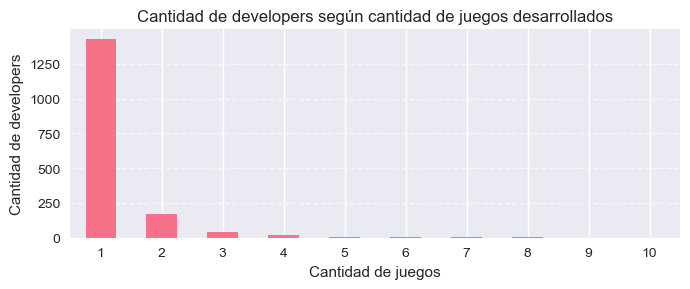

In [51]:
dev_counts = df_features['developer'].value_counts()

# Queremos ver cuántos desarrolladores tienen entre 1 y 10 juegos y cómo es esa distribución
dev_freq_distribution = dev_counts.value_counts().sort_index()
dev_freq_distribution = dev_freq_distribution.loc[1:10]

# Mostrar resultados
for i in range(1, 11):
    cantidad = dev_freq_distribution.get(i, 0)
    print(f"Developers con {i} juego(s): {cantidad}")


dev_freq_distribution = dev_counts.value_counts().sort_index()
dev_freq_distribution = dev_freq_distribution.loc[1:10]

# Creamos gráfico de barras
plt.figure(figsize=(7, 3))
dev_freq_distribution.plot(kind='bar')
plt.title('Cantidad de developers según cantidad de juegos desarrollados')
plt.xlabel('Cantidad de juegos')
plt.ylabel('Cantidad de developers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
# Reemplazar developers con 1 sólo juego por "Otro"
dev_counts = df_features['developer'].value_counts()
df_features['developer'] = df_features['developer'].apply(lambda x: x if dev_counts[x] > 1 else 'Otro')

# Chequeamos cuántos quedaron
print("Developers luego del agrupamiento:")
print(df_features['developer'].value_counts())

Developers luego del agrupamiento:
developer
Otro                     1425
Arc System Works           15
CAPCOM Co., Ltd.           10
Square Enix                 9
Wales Interactive           8
                         ... 
Anatoliy Loginovskikh       2
Vladimir Maslov             2
Voxel Bytes                 2
Travellin Cats              2
Ripknot Systems             2
Name: count, Length: 256, dtype: int64


Como se puede ver, la gran mayoría de los devs tienen sólo un juego, decidimos eliminar estos para solamente
quedarnos con los que tienen más de 1 juego, ya que son los que tienen más probabilidad de ser relevantes evitando el overfitting.

In [53]:
# Lista de developers frecuentes (más de 1 juego)
valid_devs = dev_counts[dev_counts >= 2].index

# Reemplazar los no frecuentes por "Otro" en la misma columna
df_features['developer'] = df_features['developer'].apply(lambda x: x if x in valid_devs else 'Otro')

# Chequear cuántos developers únicos quedan
print(f"Cantidad de developers únicos después del filtrado: {df_features['developer'].nunique()}")

Cantidad de developers únicos después del filtrado: 256


Luego de esta transformación decidimos aplicar target encoding a la variable developer, asignando a cada dev un valor correspondiente al promedio de review_like_rate de los juegos que desarrolló. 

Sin embargo, observamos luego que el 63% de los juegos pasan a tener el mismo valor en la nueva columna developer_encoded (aproximadamente 82.4), debido a que fueron agrupados bajo la categoría Otro, que reúne a todos los desarrolladores con un sólo juego.

Esto efecto introduce una pérdida de la capacidad discriminativa del feature, porque muchas entradas comparten el mismo valor. No obstante, decidimos conservarlo porque en los casos restantes el encoding aporta información útil que puede mejorar la predicción del modelo.


In [54]:
#Aplicamos el taget encoding
dev_avg_rating = df_features.groupby('developer')['reviews_like_rate'].mean()
df_features['developer'] = df_features['developer'].map(dev_avg_rating)

### User defined tags

Esta columna contiene etiquetas asignadas por los usuarios, separadas por comas. Dado que hay cientos de tags posibles, decidimos contar los 15 más frecuentes y convertirlos en variables binarias. Esto nos permite conservar información relevante sin aumentar demasiado la dimensionalidad.

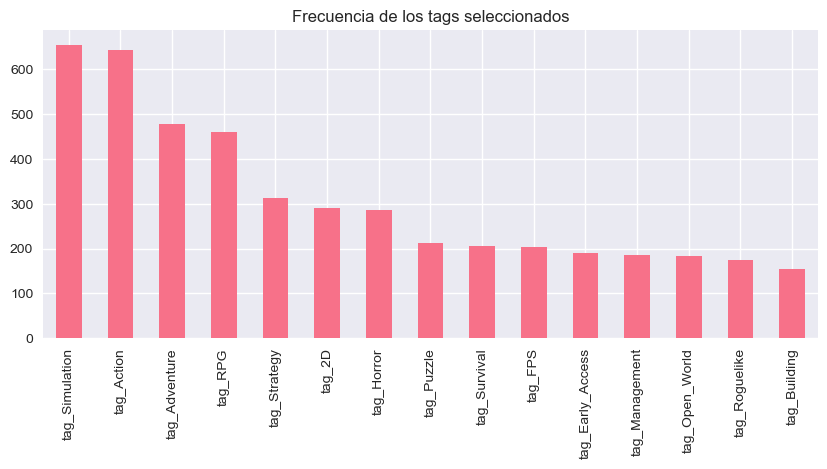

In [55]:
from collections import Counter

# Más comunes
counter = Counter(tag.strip() for tags in df_features["user_defined_tags"] for tag in tags.split(","))
top_tags = [tag for tag, _ in counter.most_common(15)]

# Crear variables binarias 
for tag in top_tags:
    col = f"tag_{tag.replace(' ', '_')}"
    df_features[col] = df_features["user_defined_tags"].str.contains(tag).astype(int)


# Visualización rápida
df_features[[f"tag_{tag.replace(' ', '_')}" for tag in top_tags]].sum().plot.bar(figsize=(10,4), title="Frecuencia de los tags seleccionados")

# Sacamos la columna original de user_defined_tags
df_features = df_features.drop(columns=["user_defined_tags"])

### Supported OS

Esta variable muestra qué sistemas operativos pueden ejecutar el juego en cuestión, los valores posibles son Windows, Linux y Mac, pero dado
que Windows está presente en todos los juegos eliminamos esa variable y binarizamos solamente mac y linux.

In [56]:
df_features['supported_mac'] = df_features['supported_os'].str.contains('mac').astype(int)
df_features['supported_linux'] = df_features['supported_os'].str.contains('linux').astype(int)

# Eliminamos la columna original ya que no aporta más información útil
df_features.drop(columns='supported_os', inplace=True)

### Other features

Esta columna, la útima de las categóricas que nos queda, representa otro conjunto de etiquetas que definen el juego. Entendemos que son etiquetas asignadas por Steam y que tienen que ver con características generales dej juego como Single-Player, Coop, etc.

In [57]:
df_features['other_features'] = df_features['other_features'].fillna('').str.split(',')

# Quitamos espacios y aplanamos la lista
all_features = df_features['other_features'].explode().str.strip()
unique_features = all_features[all_features != ''].unique()

# Cuántas hay y cuáles son
print(f"Cantidad de etiquetas únicas: {len(unique_features)}")
print("Etiquetas únicas:")
print(sorted(unique_features))

Cantidad de etiquetas únicas: 32
Etiquetas únicas:
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available', 'In-App Purchases', 'Includes Source SDK', 'Includes level editor', 'LAN Co-op', 'LAN PvP', 'MMO', 'Online Co-op', 'Online PvP', 'Remote Play Together', 'Remote Play on Phone', 'Remote Play on TV', 'Remote Play on Tablet', 'Shared/Split Screen Co-op', 'Shared/Split Screen PvP', 'Single-player', 'Stats', 'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards', 'Steam Timeline', 'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles', 'Tracked Controller Support', 'VR Only', 'VR Supported']


Se puede ver que se trata de 32 etiquetas posibles. Decidimos reducir la dimensionalidad solamente dejando las etiquetas que están presentes en al menos el 5% de los juegos, esto nos deja con 18 etiquetas:

In [58]:
all_features = df_features['other_features'].explode().str.strip()
feature_counts = Counter(all_features[all_features != ''])

# Mostrar ordenado 
feature_freq = pd.Series(feature_counts).sort_values(ascending=False)

min_freq = len(df_features) * 0.05
selected_features = feature_freq[feature_freq >= min_freq].index.tolist()

print(f"\nSeleccionamos {len(selected_features)} etiquetas frecuentes:")
print(selected_features)


Seleccionamos 16 etiquetas frecuentes:
['Single-player', 'Family Sharing', 'Steam Achievements', 'Steam Cloud', 'Steam Trading Cards', 'Online Co-op', 'Online PvP', 'Steam Leaderboards', 'Remote Play on TV', 'Steam Workshop', 'Remote Play Together', 'In-App Purchases', 'Cross-Platform Multiplayer', 'Stats', 'Remote Play on Tablet', 'Includes level editor']


In [59]:
# Binarizamos
df_features['other_features'] = df_features['other_features'].apply(
    lambda lst: [x.strip() for x in lst if x.strip() != '']
)

# Creamos una columna para cada etiqueta frecuente
for feature in selected_features:
    df_features[f'feature_{feature}'] = df_features['other_features'].apply(
        lambda x: int(feature in x)
    )

# Eliminamos la columna original
df_features.drop(columns='other_features', inplace=True)


### Conclusiones sobre las features categóricas

Creamos un gráfico para evaluar la correlación máxima absoluta (Pearson) entre las variables categóricas transformadas (user_defined_tags, supported_os, other_features, developer, release_year, release_month) y reviews_like_rate. Para las variables binarizadas (user_defined_tags, supported_os, other_features), tomamos la correlación absoluta más alta de sus columnas binarias (e.g., tag_Indie, supported_mac) para representar cada variable original. Para developer, release_year y release_month, usamos sus correlaciones absolutas tras codificación. El gráfico de barras ordena estas correlaciones (0.0068 a 0.2778), mostrando que developer y other_features tienen algo de relación con reviews_like_rate, pero todas son débiles a moderadas, sugiriendo que se necesitan modelos no lineales para capturar interacciones más complejas.



In [60]:
df_features

,game_name,reviews_like_rate,all_reviews_number,developer,price,age_restriction,rating,difficulty,length,estimated_downloads,...,feature_Online PvP,feature_Steam Leaderboards,feature_Remote Play on TV,feature_Steam Workshop,feature_Remote Play Together,feature_In-App Purchases,feature_Cross-Platform Multiplayer,feature_Stats,feature_Remote Play on Tablet,feature_Includes level editor
0,ELDEN RING NIGHTREIGN,77,53426,84.000000,25.99,17,3.96,4,50,840000,...,0,0,0,0,0,0,0,0,0,0
1,The Last of Us™ Part I,79,45424,84.500000,59.99,17,4.10,3,24,2000000,...,0,0,1,0,0,0,0,0,0,0
2,Game of Thrones: Kingsroad,61,2667,83.195789,0.00,17,3.40,3,42,361500,...,0,0,0,0,0,1,0,0,0,0
3,RoadCraft,72,5134,75.500000,27.99,0,3.20,3,26,325900,...,0,0,0,0,0,0,1,0,0,0
4,R.E.P.O.,96,147407,83.195789,5.79,10,3.58,4,54,12950000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,Alien Cat,91,372,83.195789,0.89,0,4.00,3,7,16200,...,0,0,0,0,0,0,0,0,0,0
2127,Shoot. Push. Repeat.,84,65,83.195789,0.89,0,3.64,1,3,2700,...,0,0,0,0,0,0,0,0,0,0
2128,X2: The Threat,83,416,81.666667,2.99,13,3.61,4,60,47500,...,0,0,0,0,0,0,0,0,0,0
2129,!AnyWay!,71,498,83.195789,1.35,0,3.00,3,2,79000,...,0,1,0,0,0,1,0,1,0,1


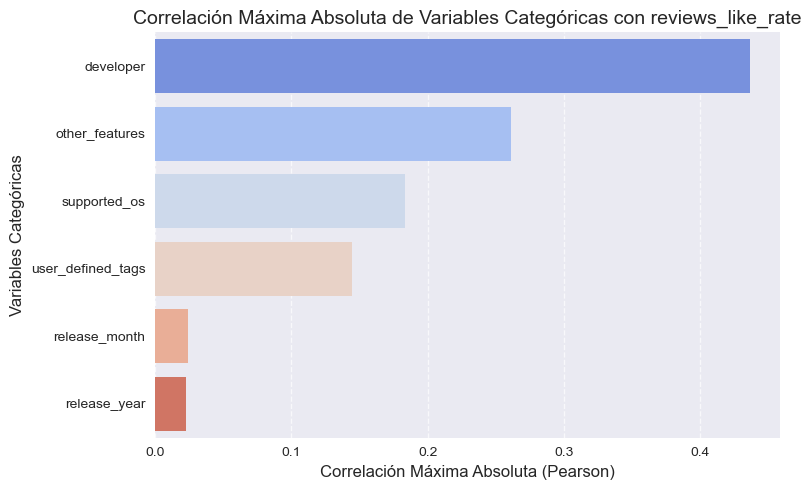


Correlaciones máximas absolutas con reviews_like_rate (ordenadas):
developer            0.4365
other_features       0.2612
supported_os         0.1834
user_defined_tags    0.1443
release_month        0.0240
release_year         0.0230
dtype: float64


In [61]:
# Identificamos las columnas categóricas
tag_columns = [col for col in df_features.columns if col.startswith('tag_')]
os_columns = [col for col in df_features.columns if col.startswith('supported_')]
feature_columns = [col for col in df_features.columns if col.startswith('feature_')]
other_columns = ['developer', 'release_year', 'release_month']

# Calculamos la correlación absoluta máxima para cada grupo de variables binarizadas
correlations = {}

# Para user_defined_tags
if tag_columns:
    tag_corrs = df_features[tag_columns].corrwith(df_features['reviews_like_rate'])
    correlations['user_defined_tags'] = tag_corrs.abs().max() if not tag_corrs.empty else 0

# Para supported_os
if os_columns:
    os_corrs = df_features[os_columns].corrwith(df_features['reviews_like_rate'])
    correlations['supported_os'] = os_corrs.abs().max() if not os_corrs.empty else 0

# Para other_features
if feature_columns:
    feature_corrs = df_features[feature_columns].corrwith(df_features['reviews_like_rate'])
    correlations['other_features'] = feature_corrs.abs().max() if not feature_corrs.empty else 0

# Para las otras variables categóricas transformadas
for col in other_columns:
    correlations[col] = abs(df_features[col].corr(df_features['reviews_like_rate']))

# Convertimos a una serie y ordenamos
correlations_series = pd.Series(correlations).sort_values(ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(x=correlations_series.values, y=correlations_series.index, palette='coolwarm')
plt.title('Correlación Máxima Absoluta de Variables Categóricas con reviews_like_rate', fontsize=14)
plt.xlabel('Correlación Máxima Absoluta (Pearson)', fontsize=12)
plt.ylabel('Variables Categóricas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostramos los valores de correlación
print("\nCorrelaciones máximas absolutas con reviews_like_rate (ordenadas):")
print(correlations_series.round(4))

Las correlaciones máximas absolutas con reviews_like_rate (de 0.0068 a 0.4370) son bajas a moderadas, esto indica asociaciones lineales débiles. developer (0.4370) y other_features (0.2684) muestran cierta relevancia, pero release_month (0.0068) aporta poco. Aunque las correlaciones son limitadas, estas variables pueden contribuir en modelos no lineales al capturar interacciones complejas.

---

## Entrenamiento

### División y escalado de los sets

Optamos por dividir el dataset en un 80% para entrenamiento y 20% para prueba, en línea con lo sugerido en las clases y el enfoque habitual en problemas supervisados con datasets de tamaño moderado como este.

In [62]:
df_features

,game_name,reviews_like_rate,all_reviews_number,developer,price,age_restriction,rating,difficulty,length,estimated_downloads,...,feature_Online PvP,feature_Steam Leaderboards,feature_Remote Play on TV,feature_Steam Workshop,feature_Remote Play Together,feature_In-App Purchases,feature_Cross-Platform Multiplayer,feature_Stats,feature_Remote Play on Tablet,feature_Includes level editor
0,ELDEN RING NIGHTREIGN,77,53426,84.000000,25.99,17,3.96,4,50,840000,...,0,0,0,0,0,0,0,0,0,0
1,The Last of Us™ Part I,79,45424,84.500000,59.99,17,4.10,3,24,2000000,...,0,0,1,0,0,0,0,0,0,0
2,Game of Thrones: Kingsroad,61,2667,83.195789,0.00,17,3.40,3,42,361500,...,0,0,0,0,0,1,0,0,0,0
3,RoadCraft,72,5134,75.500000,27.99,0,3.20,3,26,325900,...,0,0,0,0,0,0,1,0,0,0
4,R.E.P.O.,96,147407,83.195789,5.79,10,3.58,4,54,12950000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,Alien Cat,91,372,83.195789,0.89,0,4.00,3,7,16200,...,0,0,0,0,0,0,0,0,0,0
2127,Shoot. Push. Repeat.,84,65,83.195789,0.89,0,3.64,1,3,2700,...,0,0,0,0,0,0,0,0,0,0
2128,X2: The Threat,83,416,81.666667,2.99,13,3.61,4,60,47500,...,0,0,0,0,0,0,0,0,0,0
2129,!AnyWay!,71,498,83.195789,1.35,0,3.00,3,2,79000,...,0,1,0,0,0,1,0,1,0,1


In [63]:
from sklearn.model_selection import train_test_split

# Definimos X e y
# Seleccionamos solo las columnas numéricas
X = df_features.select_dtypes(include=[np.number]).drop(columns="reviews_like_rate")
y = df_features["reviews_like_rate"]


# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo de Regresión Lineal

Incluímos ahora un model de Regresión Lineal para tener como baseline para la comparación con los otros modelos.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"R2 (Linear Regression): {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

R2 (Linear Regression): 0.4710
RMSE: 8.0741


El modelo de regresión lineal nos dió un valor de R² = 0.4710, lo que muestra  que es capaz de explicar aproximadamente el 47.10% de la variabilidad de la variable objetivo. Este valor no es muy alto, pero tampoco despreciable, sobre todo si se considera la naturaleza compleja y subjetiva del fenómeno que se está modelando. Además como ya notamos en la selección de features ninguna de las mismas mostró tener una relación linealmente influyente sobre la VO.

### Modelo de Random Forest Regressor

Elegimos también aplicar un modelo de este tipo porque es capaz de capturar relaciones no lineales complejas sin necesidad de una transformación explícita de las variables lo que nos es relevante en este caso considerando que muchas variables categóricas mostraron baja correlación lineal con la variable objetivo.

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R2 (Random Forest): {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

R2 (Random Forest): 0.4900
RMSE: 7.9276


Este valor es un poco superior al obtenido con regresión lineal, lo que sugiere que no hay una ganancia significativa por capturar relaciones no lineales con las variables utilizadas en el dataset.

El RMSE fue similar al del modelo lineal y sin una mejora en la precisión. Esto refuerza las observaciones realizadas en la etapa de selección de features, donde se mostró que muchas variables no tenían relación fuerte ni lineal ni no lineal con la variable objetivo.

### Modelo de Soporte Vectorial (SVR) + Optuna

En el análisis exploratorio del dataset observamos que muchas de las variables no tienen una relación lineal fuerte con reviews_like_rate, pero sí podrían combinarse no linealmente para explicar mejor el comportamiento de la variable objetivo. Por esta razón, aplicamos SVR para y Optuna para ver si podemos encontrar hiperparámetros que mejoren el modelo.


In [67]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

def objective(trial):
    C = trial.suggest_float("C", 1e-3, 1e4, log=True)
    epsilon = trial.suggest_float("epsilon", 1e-4, 5.0, log=True)
    #gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    gamma = trial.suggest_float("gamma", 1e-4, 1.0, log=True)


    svr = SVR(C=C, epsilon=epsilon, gamma=gamma)
    scores = cross_val_score(svr, X_train_scaled, y_train, cv=3, scoring="r2")
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Entrenar el mejor modelo
best_params = study.best_params
svr_best = SVR(**best_params)
svr_best.fit(X_train_scaled, y_train)
y_pred_svr = svr_best.predict(X_test_scaled)

r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

[I 2025-06-21 18:53:10,536] A new study created in memory with name: no-name-60f8baab-29de-49a3-bcab-9715390a354b
[I 2025-06-21 18:53:11,629] Trial 0 finished with value: 0.29537068913939835 and parameters: {'C': 263.4180203502137, 'epsilon': 0.1271624533644217, 'gamma': 0.045809179845798034}. Best is trial 0 with value: 0.29537068913939835.
[I 2025-06-21 18:53:12,142] Trial 1 finished with value: 0.04024881374050726 and parameters: {'C': 0.5898649571325765, 'epsilon': 0.001547989576443581, 'gamma': 0.0005040337300967291}. Best is trial 0 with value: 0.29537068913939835.
[I 2025-06-21 18:53:12,648] Trial 2 finished with value: -0.03082374372103362 and parameters: {'C': 0.16385402919440667, 'epsilon': 0.0006710614028350681, 'gamma': 0.00040711984922559436}. Best is trial 0 with value: 0.29537068913939835.
[I 2025-06-21 18:53:13,204] Trial 3 finished with value: 0.4964219941020019 and parameters: {'C': 10.74533877651893, 'epsilon': 0.5558248091237081, 'gamma': 0.007811296868514355}. Best

### Análisis del Rendimiento del Modelo SVR con R²

El resultado obtenido de R² = 0.505 en el modelo SVR optimizado con Optuna representa un rendimiento moderado o regular. Este valor indica que el modelo está explicando aproximadamente el 50% de la varianza presente en los datos, lo cual sugiere que existe un margen considerable de mejora en la capacidad predictiva del algoritmo.

Al examinar la configuración de hiperparámetros utilizada, se identifican varias limitaciones o anomalias que pueden estar restringiendo o dando un indicio de que se puede mejorar en el entrenamiento del modelo. El rango establecido para el parámetro epsilon entre 1e-4 y 5.0 pareceria inadecuado, ya que este parámetro debería explorar valores amplios, pero idealmente en un rango logarítmico desde cota inferior 0.001 hasta una cota superior de entre 1.0 y en ciertos casos llega hasta 5.0. Este valor no pareceria estar afectando a la formacion ya sea que se utilice como cota superior 1.0 o 5.0 es indistinto pues el valor obtenido tiene ligeros cambios de +/- 0.01.

La utilización exclusiva del kernel RBF, aunque es una elección común, limita la capacidad del modelo para capturar diferentes tipos de patrones en los datos. La exploración de kernels alternativos como el lineal, polinomial o sigmoide podría revelar estructuras de datos que el kernel RBF no está encontrando.

El número de trials establecido en 150 puede ser insuficiente para que el algoritmo de optimización converja hacia los mejores hiperparámetros posibles. La naturaleza estocástica de Optuna requiere una exploración más exhaustiva del espacio de búsqueda, particularmente cuando se trabaja con múltiples hiperparámetros que pueden tener interacciones complejas entre sí. De todas formas realizamos pruebas con 500 trials y hasta con 1000 trials, pero llegado a un punto entre las 100 y las 150 trials, el resultado se asentaba dejando de fluctuar.

Por otra parte, un R² de 0.5 puede indicar que SVR no es necesariamente el algoritmo más adecuado para este dataset en particular. Los algoritmos basados en árboles como Random Forest o métodos de boosting como XGBoost frecuentemente superan a SVR en problemas de regresión, especialmente cuando los datos presentan relaciones no lineales complejas o patrones que los kernels tradicionales de SVR no pueden capturar eficientemente.

Nuestra concuclusion con el R² resultando en 0.505 es que, si bien representa una oportunidad significativa de mejora que puede abordarse tanto a través de una optimización más exhaustiva de hiperparámetros como mediante la consideración de enfoques algorítmicos y/o herramientas alternativas más adecuados para las características específicas del conjunto de datos en cuestión, no se trata de un modelo completamente deficiente.